# Alphabet Soup Deep Learning

In this challenge, you’ll have to build your own machine learning model that will be able to predict the success of a venture paid by Alphabet soup. Your trained model will be used to determine the future decisions of the company—only those projects likely to be a success will receive any future funding from Alphabet Soup.

### Import, Analyze, Clean, and Preprocess Classification Dataset

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import tensorflow as tf
import os

# Import input dataset
charityData_df = pd.read_csv('resources/charity_data.csv')
charityData_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Generate our categorical variable list
charityData_cat1 = charityData_df.dtypes[charityData_df.dtypes == "object"].index.tolist()
print(charityData_cat1)

['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


In [3]:
# Check the number of unique values in each column
charityData_df[charityData_cat1].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

#### Dropping Columns: Name, EIN
We need to drop the name, ein, column because if we bucket the data to only those that are prevelent, this algorithm will be very good at determine existing donors, but not new donors. It will also predict baised on EIN.

In [4]:
# Print out the Name value counts
name_counts = charityData_df.NAME.value_counts()
print(name_counts[:50])

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

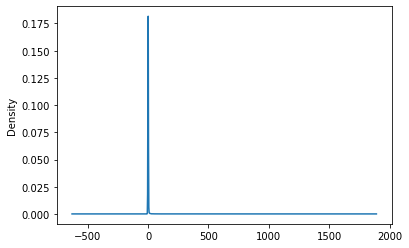

In [5]:
# Visualize the value counts
name_counts.plot.density()

In [6]:
charityData_df = charityData_df.drop("NAME",1)
charityData_df.head()

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
charityData_df = charityData_df.drop("EIN",1)
charityData_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
charityData_df = charityData_df.drop("STATUS",1)
charityData_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [9]:
charityData_df = charityData_df.drop("SPECIAL_CONSIDERATIONS",1)
charityData_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


#### Encoding Income Amount Column
We need to drop the name column because if we bucket the data to only those that are prevelent, this algorithm will be very good at determine existing donors, but not new donors.

In [10]:
# Print out the Name value counts
incomeAmt_counts = charityData_df.INCOME_AMT.value_counts()
incomeAmt_counts[:50]

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

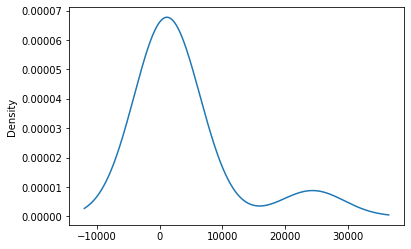

In [11]:
# Visualize the value counts
incomeAmt_counts.plot.density()

<!-- # Visualize the value counts
INCOME_AMT_counts.plot.density() -->

In [12]:
# Determine which values to replace
replace_incomeAmt = list(incomeAmt_counts[incomeAmt_counts < 1000].index)

# Replace in DataFrame
for incomeAmt in replace_incomeAmt:
    charityData_df.INCOME_AMT = charityData_df.INCOME_AMT.replace(incomeAmt,"Other")
    
# Check to make sure binning was successful
charityData_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

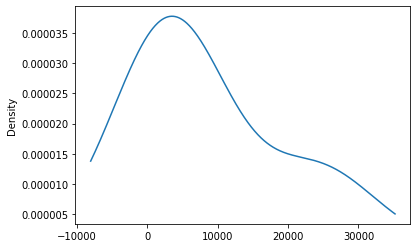

In [13]:
# Re-Check the value counts
incomeAmt_counts_new = charityData_df.INCOME_AMT.value_counts()
incomeAmt_counts_new.plot.density()

In [14]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_incomeAMT_df = pd.DataFrame(enc.fit_transform(charityData_df.INCOME_AMT.values.reshape(-1,1)))

# Rename encoded columns
encode_incomeAMT_df.columns = enc.get_feature_names(['INCOME_AMT'])
encode_incomeAMT_df.head()

,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0


In [15]:
# Merge the two DataFrames together and drop the classifcation column
charityData_df.merge(encode_incomeAMT_df,left_index=True,right_index=True).drop("INCOME_AMT",1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,T10,Independent,C1000,ProductDev,Association,5000,1,1.0,0.0,0.0,0.0
1,T3,Independent,C2000,Preservation,Co-operative,108590,1,0.0,0.0,0.0,1.0
2,T5,CompanySponsored,C3000,ProductDev,Association,5000,0,1.0,0.0,0.0,0.0
3,T3,CompanySponsored,C2000,Preservation,Trust,6692,1,0.0,0.0,0.0,1.0
4,T3,Independent,C1000,Heathcare,Trust,142590,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,5000,0,1.0,0.0,0.0,0.0
34295,T4,CompanySponsored,C3000,ProductDev,Association,5000,0,1.0,0.0,0.0,0.0
34296,T3,CompanySponsored,C2000,Preservation,Association,5000,0,1.0,0.0,0.0,0.0
34297,T5,Independent,C3000,ProductDev,Association,5000,1,1.0,0.0,0.0,0.0


#### Encoding Classication Column
We encode classification column because there are over 71 different classification categories.

In [16]:
# Print out the Classication value counts
classification_counts = charityData_df.CLASSIFICATION.value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C2380        1
C1283        1
C4120        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64


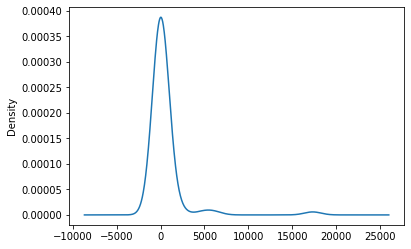

In [17]:
# Visualize the value counts
classification_counts.plot.density()

In [18]:
# Determine which values to replace
replace_classifications = list(classification_counts[classification_counts < 1900].index)

# Replace in DataFrame
for classifications in replace_classifications:
    charityData_df.CLASSIFICATION = charityData_df.CLASSIFICATION.replace(classifications,"Other")
    
# Check to make sure binning was successful
charityData_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     4144
C3000     1918
Name: CLASSIFICATION, dtype: int64

In [19]:
# Re-Check the value counts
classification_counts_new = charityData_df.CLASSIFICATION.value_counts()
print(classification_counts_new)

C1000    17326
C2000     6074
C1200     4837
Other     4144
C3000     1918
Name: CLASSIFICATION, dtype: int64


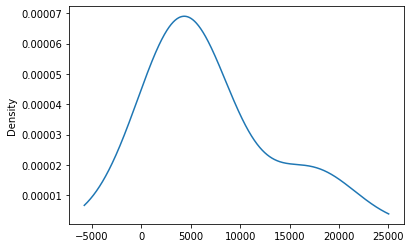

In [20]:
classification_counts_new.plot.density()

In [21]:
# Create the OneHotEncoder instance
enc1 = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_Classification_df = pd.DataFrame(enc1.fit_transform(charityData_df.CLASSIFICATION.values.reshape(-1,1)))

# Rename encoded columns
encode_Classification_df.columns = enc1.get_feature_names(['CLASSIFICATION'])
encode_Classification_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [22]:
# Merge the two DataFrames together and drop the classifcation column
charityData_df.merge(encode_Classification_df,left_index=True,right_index=True).drop("CLASSIFICATION",1)

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,T10,Independent,ProductDev,Association,0,5000,1,1.0,0.0,0.0,0.0,0.0
1,T3,Independent,Preservation,Co-operative,Other,108590,1,0.0,0.0,1.0,0.0,0.0
2,T5,CompanySponsored,ProductDev,Association,0,5000,0,0.0,0.0,0.0,1.0,0.0
3,T3,CompanySponsored,Preservation,Trust,Other,6692,1,0.0,0.0,1.0,0.0,0.0
4,T3,Independent,Heathcare,Trust,100000-499999,142590,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,0,5000,0,1.0,0.0,0.0,0.0,0.0
34295,T4,CompanySponsored,ProductDev,Association,0,5000,0,0.0,0.0,0.0,1.0,0.0
34296,T3,CompanySponsored,Preservation,Association,0,5000,0,0.0,0.0,1.0,0.0,0.0
34297,T5,Independent,ProductDev,Association,0,5000,1,0.0,0.0,0.0,1.0,0.0


#### Encoding Application_Type Column

In [23]:
# Print out the Application_Type value counts
application_counts = charityData_df.APPLICATION_TYPE.value_counts()
print(application_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


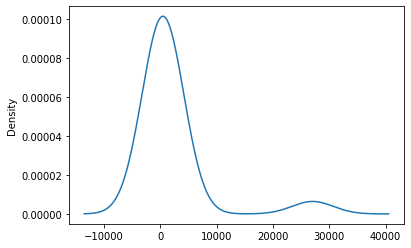

In [24]:
application_counts.plot.density()

In [25]:
# Determine which values to replace
replace_applications = list(application_counts[application_counts < 750].index)

# Replace in DataFrame
for applications in replace_applications:
    charityData_df.APPLICATION_TYPE = charityData_df.APPLICATION_TYPE.replace(applications,"Other_type")
    
# Check to make sure binning was successful
charityData_df.APPLICATION_TYPE.value_counts()

T3            27037
Other_type     2266
T4             1542
T6             1216
T5             1173
T19            1065
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Create the OneHotEncoder instance
enc2 = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_Application_df = pd.DataFrame(enc2.fit_transform(charityData_df.APPLICATION_TYPE.values.reshape(-1,1)))

# Rename encoded columns
encode_Application_df.columns = enc2.get_feature_names(['APPLICATION_TYPE'])
encode_Application_df.head()

,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Application_Type column
charityData_df.merge(encode_Application_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,Independent,C1000,ProductDev,Association,0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0
1,Independent,C2000,Preservation,Co-operative,Other,108590,1,0.0,0.0,1.0,0.0,0.0,0.0
2,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0.0,0.0,0.0,0.0,1.0,0.0
3,CompanySponsored,C2000,Preservation,Trust,Other,6692,1,0.0,0.0,1.0,0.0,0.0,0.0
4,Independent,C1000,Heathcare,Trust,100000-499999,142590,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Independent,C1000,ProductDev,Association,0,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34295,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34296,CompanySponsored,C2000,Preservation,Association,0,5000,0,0.0,0.0,1.0,0.0,0.0,0.0
34297,Independent,C3000,ProductDev,Association,0,5000,1,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
application_counts_new = charityData_df.APPLICATION_TYPE.value_counts()
print(application_counts_new)

T3            27037
Other_type     2266
T4             1542
T6             1216
T5             1173
T19            1065
Name: APPLICATION_TYPE, dtype: int64


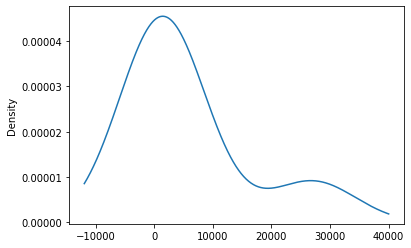

In [29]:
application_counts_new.plot.density()

#### Encoding Object Columns

In [30]:
# Generate our categorical variable list
charityData_cat2 = charityData_df.dtypes[charityData_df.dtypes == "object"].index.tolist()
print(charityData_cat2)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']


In [31]:
# Check the number of unique values in each column
charityData_df[charityData_cat2].nunique()

APPLICATION_TYPE    6
AFFILIATION         6
CLASSIFICATION      5
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          4
dtype: int64

In [32]:
# Create a OneHotEncoder instance
enc3 = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc3.fit_transform(charityData_df[charityData_cat2]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc3.get_feature_names(charityData_cat2)
encode_df.head()

,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [33]:
# Merge the two DataFrames together and drop the Application_Type column
charityData_df = charityData_df.merge(encode_df,left_index=True,right_index=True)
charityData_df = charityData_df.drop(charityData_cat2,1)
charityData_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


#### All of the inputs:

In [34]:
charityData_columns = [col for col in charityData_df.columns]
charityData_columns

['ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other_type',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_Other']

### Select, Design, and Train a binary classification model

In [35]:
# Split our preprocessed data into our features and target arrays
y = charityData_df["IS_SUCCESSFUL"].values
X = charityData_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[-0.03348439, -0.26450123, -0.1803104 , ..., -0.32918556,
        -0.35186578, -0.29752989],
       [-0.03348439, -0.26450123, -0.1803104 , ..., -0.32918556,
        -0.35186578, -0.29752989],
       [-0.03348439, -0.26450123, -0.1803104 , ..., -0.32918556,
        -0.35186578, -0.29752989],
       ...,
       [-0.03229417, -0.26450123, -0.1803104 , ..., -0.32918556,
         2.8419928 , -0.29752989],
       [-0.03348439, -0.26450123, -0.1803104 , ..., -0.32918556,
        -0.35186578, -0.29752989],
       [-0.01093629, -0.26450123, -0.1803104 , ..., -0.32918556,
        -0.35186578,  3.36100686]])

In [37]:
len(X_train[0])

31

In [38]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 18
hidden_nodes_layer3 = 18
hidden_nodes_layer4 = 12
hidden_nodes_layer5 = 12
hidden_nodes_layer6 = 8
hidden_nodes_layer7 = 8
hidden_nodes_layer8 = 6
hidden_nodes_layer9 = 6

nn = tf.keras.models.Sequential()

#First Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

#Second Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

#Third Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

#Fourth Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Seventh Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="tanh"))

# Eighth Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="tanh"))

# Ninth Hidden Layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer9, activation="tanh"))

#Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 7

In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [41]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/200
  640/25724 [..............................] - ETA: 55s - loss: 0.6681 - accuracy: 0.6016  
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1600/25724 [>.............................] - ETA: 22s - loss: 0.6363 - accuracy: 0.6550
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2624/25724 [==>...........................] - ETA: 14s - loss: 0.6242 - accuracy: 0.6742
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3648/25724 [===>..........................] - ETA: 10s - loss: 0.6153 - accuracy: 0.6870
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4672/25724 [====>.........................] - ETA: 8s - loss: 0.6099 - accuracy: 0.6933
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5696/25724 [=====>........................] - ETA: 6s - loss: 0.6060 - accuracy: 0.6980
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6720/25724 [======>.......................] - ETA: 5s - loss: 0.6047 - accuracy: 0

 4480/25724 [====>.........................] - ETA: 2s - loss: 0.5643 - accuracy: 0.7281
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5472/25724 [=====>........................] - ETA: 2s - loss: 0.5673 - accuracy: 0.7244
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6496/25724 [======>.......................] - ETA: 1s - loss: 0.5697 - accuracy: 0.7235
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7520/25724 [=======>......................] - ETA: 1s - loss: 0.5711 - accuracy: 0.7207
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.5724 - accuracy: 0.7216
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9504/25724 [==========>...................] - ETA: 1s - loss: 0.5698 - accuracy: 0.7238
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10560/25724 [===========>..................] - ETA: 1s - loss: 0.5677 - accuracy: 0.7258
Epoch 00003: saving model to checkp

 9344/25724 [=========>....................] - ETA: 1s - loss: 0.5581 - accuracy: 0.7267
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.5596 - accuracy: 0.7272
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11360/25724 [============>.................] - ETA: 1s - loss: 0.5581 - accuracy: 0.7285
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12384/25724 [=============>................] - ETA: 1s - loss: 0.5593 - accuracy: 0.7280
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13440/25724 [==============>...............] - ETA: 1s - loss: 0.5591 - accuracy: 0.7289
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14464/25724 [===============>..............] - ETA: 1s - loss: 0.5605 - accuracy: 0.7277
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15456/25724 [=================>............] - ETA: 1s - loss: 0.5608 - accuracy: 0.7276
Epoch 00005: saving model to checkp

14144/25724 [===============>..............] - ETA: 1s - loss: 0.5570 - accuracy: 0.7307
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15200/25724 [================>.............] - ETA: 1s - loss: 0.5564 - accuracy: 0.7318
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16192/25724 [=================>............] - ETA: 0s - loss: 0.5578 - accuracy: 0.7307
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17248/25724 [===================>..........] - ETA: 0s - loss: 0.5577 - accuracy: 0.7308
Epoch 00007: saving model to checkpoints/weights.07.hdf5
18272/25724 [====================>.........] - ETA: 0s - loss: 0.5575 - accuracy: 0.7305
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5588 - accuracy: 0.7289
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20320/25724 [======================>.......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7277
Epoch 00007: saving model to checkp

19072/25724 [=====================>........] - ETA: 0s - loss: 0.5599 - accuracy: 0.7273
Epoch 00009: saving model to checkpoints/weights.09.hdf5
20064/25724 [======================>.......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7267
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 0.5605 - accuracy: 0.7271
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22112/25724 [========================>.....] - ETA: 0s - loss: 0.5602 - accuracy: 0.7273
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5595 - accuracy: 0.7281
Epoch 00009: saving model to checkpoints/weights.09.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5588 - accuracy: 0.7284
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7293
Epoch 00009: saving model to checkp

23936/25724 [==========================>...] - ETA: 0s - loss: 0.5589 - accuracy: 0.7277
Epoch 00011: saving model to checkpoints/weights.11.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5588 - accuracy: 0.7281
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 3s 103us/sample - loss: 0.5580 - accuracy: 0.7288
Epoch 12/200
   32/25724 [..............................] - ETA: 2s - loss: 0.5933 - accuracy: 0.6562
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 1248/25724 [>.............................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7372
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2272/25724 [=>............................] - ETA: 2s - loss: 0.5572 - accuracy: 0.7333
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3296/25724 [==>...........................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7318
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4352/25724 [=

 2048/25724 [=>............................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7295
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3072/25724 [==>...........................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7321
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4064/25724 [===>..........................] - ETA: 2s - loss: 0.5562 - accuracy: 0.7264
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5120/25724 [====>.........................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7322
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.5549 - accuracy: 0.7302
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7136/25724 [=======>......................] - ETA: 1s - loss: 0.5530 - accuracy: 0.7321
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 8128/25724 [========>.....................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7341
Epoch 00014: saving model to checkp

 6880/25724 [=======>......................] - ETA: 1s - loss: 0.5548 - accuracy: 0.7311
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 7904/25724 [========>.....................] - ETA: 1s - loss: 0.5542 - accuracy: 0.7327
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8928/25724 [=========>....................] - ETA: 1s - loss: 0.5550 - accuracy: 0.7315
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9952/25724 [==========>...................] - ETA: 1s - loss: 0.5573 - accuracy: 0.7278
Epoch 00016: saving model to checkpoints/weights.16.hdf5
11008/25724 [===========>..................] - ETA: 1s - loss: 0.5561 - accuracy: 0.7291
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12000/25724 [============>.................] - ETA: 1s - loss: 0.5572 - accuracy: 0.7274
Epoch 00016: saving model to checkpoints/weights.16.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 0.5568 - accuracy: 0.7279
Epoch 00016: saving model to checkp

11744/25724 [============>.................] - ETA: 1s - loss: 0.5542 - accuracy: 0.7296
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12768/25724 [=============>................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7310
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13760/25724 [===============>..............] - ETA: 1s - loss: 0.5528 - accuracy: 0.7313
Epoch 00018: saving model to checkpoints/weights.18.hdf5
14848/25724 [================>.............] - ETA: 1s - loss: 0.5555 - accuracy: 0.7291
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15872/25724 [=================>............] - ETA: 1s - loss: 0.5557 - accuracy: 0.7295
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16864/25724 [==================>...........] - ETA: 0s - loss: 0.5570 - accuracy: 0.7284
Epoch 00018: saving model to checkpoints/weights.18.hdf5
17888/25724 [===================>..........] - ETA: 0s - loss: 0.5564 - accuracy: 0.7291
Epoch 00018: saving model to checkp

16608/25724 [==================>...........] - ETA: 0s - loss: 0.5579 - accuracy: 0.7304
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17632/25724 [===================>..........] - ETA: 0s - loss: 0.5584 - accuracy: 0.7296
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18656/25724 [====================>.........] - ETA: 0s - loss: 0.5576 - accuracy: 0.7298
Epoch 00020: saving model to checkpoints/weights.20.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5559 - accuracy: 0.7308
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.5550 - accuracy: 0.7315
Epoch 00020: saving model to checkpoints/weights.20.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.5547 - accuracy: 0.7321
Epoch 00020: saving model to checkpoints/weights.20.hdf5
22752/25724 [=========================>....] - ETA: 0s - loss: 0.5542 - accuracy: 0.7320
Epoch 00020: saving model to checkp

21472/25724 [========================>.....] - ETA: 0s - loss: 0.5556 - accuracy: 0.7325
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.5548 - accuracy: 0.7327
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5556 - accuracy: 0.7319
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.5550 - accuracy: 0.7322
Epoch 00022: saving model to checkpoints/weights.22.hdf5
25724/25724 [==============================] - 3s 107us/sample - loss: 0.5546 - accuracy: 0.7322
Epoch 23/200
   32/25724 [..............................] - ETA: 3s - loss: 0.5862 - accuracy: 0.6875
Epoch 00023: saving model to checkpoints/weights.23.hdf5
  960/25724 [>.............................] - ETA: 2s - loss: 0.5586 - accuracy: 0.7260
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 1920/25724 [=

Epoch 25/200
  608/25724 [..............................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7467
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1600/25724 [>.............................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7362
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2624/25724 [==>...........................] - ETA: 2s - loss: 0.5557 - accuracy: 0.7268
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3616/25724 [===>..........................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7306
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 4672/25724 [====>.........................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7295
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 5696/25724 [=====>........................] - ETA: 2s - loss: 0.5557 - accuracy: 0.7277
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6720/25724 [======>.......................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7332
Epoch 00025: saving mo

 4416/25724 [====>.........................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7294
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5440/25724 [=====>........................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7357
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6432/25724 [======>.......................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7359
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 7488/25724 [=======>......................] - ETA: 2s - loss: 0.5496 - accuracy: 0.7341
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7352
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9536/25724 [==========>...................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7337
Epoch 00027: saving model to checkpoints/weights.27.hdf5
10560/25724 [===========>..................] - ETA: 1s - loss: 0.5513 - accuracy: 0.7329
Epoch 00027: saving model to checkp

 9248/25724 [=========>....................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7326
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10272/25724 [==========>...................] - ETA: 1s - loss: 0.5503 - accuracy: 0.7322
Epoch 00029: saving model to checkpoints/weights.29.hdf5
11264/25724 [============>.................] - ETA: 1s - loss: 0.5492 - accuracy: 0.7336
Epoch 00029: saving model to checkpoints/weights.29.hdf5
12320/25724 [=============>................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7337
Epoch 00029: saving model to checkpoints/weights.29.hdf5
13344/25724 [==============>...............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7349
Epoch 00029: saving model to checkpoints/weights.29.hdf5
14368/25724 [===============>..............] - ETA: 1s - loss: 0.5495 - accuracy: 0.7343
Epoch 00029: saving model to checkpoints/weights.29.hdf5
15392/25724 [================>.............] - ETA: 1s - loss: 0.5496 - accuracy: 0.7344
Epoch 00029: saving model to checkp

14112/25724 [===============>..............] - ETA: 1s - loss: 0.5520 - accuracy: 0.7350
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15136/25724 [================>.............] - ETA: 1s - loss: 0.5521 - accuracy: 0.7344
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16160/25724 [=================>............] - ETA: 1s - loss: 0.5524 - accuracy: 0.7340
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 0.5519 - accuracy: 0.7346
Epoch 00031: saving model to checkpoints/weights.31.hdf5
18208/25724 [====================>.........] - ETA: 0s - loss: 0.5522 - accuracy: 0.7346
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5534 - accuracy: 0.7332
Epoch 00031: saving model to checkpoints/weights.31.hdf5
20256/25724 [======================>.......] - ETA: 0s - loss: 0.5533 - accuracy: 0.7330
Epoch 00031: saving model to checkp

18944/25724 [=====================>........] - ETA: 0s - loss: 0.5502 - accuracy: 0.7356
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7362
Epoch 00033: saving model to checkpoints/weights.33.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5505 - accuracy: 0.7354
Epoch 00033: saving model to checkpoints/weights.33.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5520 - accuracy: 0.7341
Epoch 00033: saving model to checkpoints/weights.33.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5526 - accuracy: 0.7336
Epoch 00033: saving model to checkpoints/weights.33.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.5519 - accuracy: 0.7337
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7333
Epoch 00033: saving model to checkp

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5519 - accuracy: 0.7330
Epoch 00035: saving model to checkpoints/weights.35.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5510 - accuracy: 0.7342
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 3s 123us/sample - loss: 0.5518 - accuracy: 0.7338
Epoch 36/200
  512/25724 [..............................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7188
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1280/25724 [>.............................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7328
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 2176/25724 [=>............................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7348
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 3200/25724 [==>...........................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7306
Epoch 00036: saving model to checkpoints/weights.36.hdf5
 4704/25724 [=

 1952/25724 [=>............................] - ETA: 3s - loss: 0.5584 - accuracy: 0.7295
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3328/25724 [==>...........................] - ETA: 3s - loss: 0.5545 - accuracy: 0.7353
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4448/25724 [====>.........................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7300
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 5120/25724 [====>.........................] - ETA: 2s - loss: 0.5572 - accuracy: 0.7322
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 6432/25724 [======>.......................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7379
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7520/25724 [=======>......................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7395
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 8192/25724 [========>.....................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7385
Epoch 00038: saving model to checkp

 7232/25724 [=======>......................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7304
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7872/25724 [========>.....................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7294
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 9184/25724 [=========>....................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7336
Epoch 00040: saving model to checkpoints/weights.40.hdf5
10272/25724 [==========>...................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7354
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11360/25724 [============>.................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7361
Epoch 00040: saving model to checkpoints/weights.40.hdf5
11968/25724 [============>.................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7350
Epoch 00040: saving model to checkpoints/weights.40.hdf5
13312/25724 [==============>...............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7339
Epoch 00040: saving model to checkp

11968/25724 [============>.................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7288
Epoch 00042: saving model to checkpoints/weights.42.hdf5
12992/25724 [==============>...............] - ETA: 1s - loss: 0.5565 - accuracy: 0.7280
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.5549 - accuracy: 0.7296
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15040/25724 [================>.............] - ETA: 1s - loss: 0.5536 - accuracy: 0.7315
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16096/25724 [=================>............] - ETA: 1s - loss: 0.5533 - accuracy: 0.7318
Epoch 00042: saving model to checkpoints/weights.42.hdf5
17152/25724 [===================>..........] - ETA: 1s - loss: 0.5522 - accuracy: 0.7326
Epoch 00042: saving model to checkpoints/weights.42.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.5515 - accuracy: 0.7327
Epoch 00042: saving model to checkp

16768/25724 [==================>...........] - ETA: 1s - loss: 0.5471 - accuracy: 0.7352
Epoch 00044: saving model to checkpoints/weights.44.hdf5
17792/25724 [===================>..........] - ETA: 1s - loss: 0.5472 - accuracy: 0.7349
Epoch 00044: saving model to checkpoints/weights.44.hdf5
18816/25724 [====================>.........] - ETA: 1s - loss: 0.5490 - accuracy: 0.7339
Epoch 00044: saving model to checkpoints/weights.44.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7335
Epoch 00044: saving model to checkpoints/weights.44.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5507 - accuracy: 0.7333
Epoch 00044: saving model to checkpoints/weights.44.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7335
Epoch 00044: saving model to checkpoints/weights.44.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5506 - accuracy: 0.7332
Epoch 00044: saving model to checkp

21632/25724 [========================>.....] - ETA: 0s - loss: 0.5503 - accuracy: 0.7369
Epoch 00046: saving model to checkpoints/weights.46.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5517 - accuracy: 0.7351
Epoch 00046: saving model to checkpoints/weights.46.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5516 - accuracy: 0.7347
Epoch 00046: saving model to checkpoints/weights.46.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5507 - accuracy: 0.7353
Epoch 00046: saving model to checkpoints/weights.46.hdf5
25724/25724 [==============================] - 4s 166us/sample - loss: 0.5510 - accuracy: 0.7348
Epoch 47/200
   32/25724 [..............................] - ETA: 4s - loss: 0.5220 - accuracy: 0.7812
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1024/25724 [>.............................] - ETA: 4s - loss: 0.5515 - accuracy: 0.7324
Epoch 00047: saving model to checkpoints/weights.47.hdf5
 2048/25724 [=

25724/25724 [==============================] - 5s 178us/sample - loss: 0.5510 - accuracy: 0.7339
Epoch 49/200
  768/25724 [..............................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7344
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 1728/25724 [=>............................] - ETA: 3s - loss: 0.5491 - accuracy: 0.7309
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2752/25724 [==>...........................] - ETA: 3s - loss: 0.5505 - accuracy: 0.7315
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 3776/25724 [===>..........................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7352
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 4768/25724 [====>.........................] - ETA: 3s - loss: 0.5509 - accuracy: 0.7355
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5792/25724 [=====>........................] - ETA: 3s - loss: 0.5563 - accuracy: 0.7298
Epoch 00049: saving model to checkpoints/weights.49.hdf5
 6848/25724 [=

 4576/25724 [====>.........................] - ETA: 3s - loss: 0.5525 - accuracy: 0.7327
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 5568/25724 [=====>........................] - ETA: 3s - loss: 0.5501 - accuracy: 0.7346
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6560/25724 [======>.......................] - ETA: 3s - loss: 0.5494 - accuracy: 0.7348
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 7616/25724 [=======>......................] - ETA: 3s - loss: 0.5510 - accuracy: 0.7357
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 8640/25724 [=========>....................] - ETA: 3s - loss: 0.5517 - accuracy: 0.7351
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9632/25724 [==========>...................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7330
Epoch 00051: saving model to checkpoints/weights.51.hdf5
10656/25724 [===========>..................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7327
Epoch 00051: saving model to checkp

 9376/25724 [=========>....................] - ETA: 3s - loss: 0.5544 - accuracy: 0.7293
Epoch 00053: saving model to checkpoints/weights.53.hdf5
10400/25724 [===========>..................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7293
Epoch 00053: saving model to checkpoints/weights.53.hdf5
11456/25724 [============>.................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7299
Epoch 00053: saving model to checkpoints/weights.53.hdf5
12448/25724 [=============>................] - ETA: 2s - loss: 0.5539 - accuracy: 0.7309
Epoch 00053: saving model to checkpoints/weights.53.hdf5
13504/25724 [==============>...............] - ETA: 2s - loss: 0.5540 - accuracy: 0.7305
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14528/25724 [===============>..............] - ETA: 2s - loss: 0.5515 - accuracy: 0.7328
Epoch 00053: saving model to checkpoints/weights.53.hdf5
15552/25724 [=================>............] - ETA: 1s - loss: 0.5516 - accuracy: 0.7328
Epoch 00053: saving model to checkp

14240/25724 [===============>..............] - ETA: 2s - loss: 0.5501 - accuracy: 0.7346
Epoch 00055: saving model to checkpoints/weights.55.hdf5
15296/25724 [================>.............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7339
Epoch 00055: saving model to checkpoints/weights.55.hdf5
16320/25724 [==================>...........] - ETA: 1s - loss: 0.5518 - accuracy: 0.7327
Epoch 00055: saving model to checkpoints/weights.55.hdf5
17312/25724 [===================>..........] - ETA: 1s - loss: 0.5515 - accuracy: 0.7320
Epoch 00055: saving model to checkpoints/weights.55.hdf5
18336/25724 [====================>.........] - ETA: 1s - loss: 0.5516 - accuracy: 0.7321
Epoch 00055: saving model to checkpoints/weights.55.hdf5
19360/25724 [=====================>........] - ETA: 1s - loss: 0.5501 - accuracy: 0.7337
Epoch 00055: saving model to checkpoints/weights.55.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7340
Epoch 00055: saving model to checkp

19136/25724 [=====================>........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7376
Epoch 00057: saving model to checkpoints/weights.57.hdf5
20160/25724 [======================>.......] - ETA: 0s - loss: 0.5449 - accuracy: 0.7382
Epoch 00057: saving model to checkpoints/weights.57.hdf5
21184/25724 [=======================>......] - ETA: 0s - loss: 0.5458 - accuracy: 0.7374
Epoch 00057: saving model to checkpoints/weights.57.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.5461 - accuracy: 0.7371
Epoch 00057: saving model to checkpoints/weights.57.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5463 - accuracy: 0.7366
Epoch 00057: saving model to checkpoints/weights.57.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5471 - accuracy: 0.7364
Epoch 00057: saving model to checkpoints/weights.57.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5490 - accuracy: 0.7345
Epoch 00057: saving model to checkp

24096/25724 [===========================>..] - ETA: 0s - loss: 0.5508 - accuracy: 0.7337
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5508 - accuracy: 0.7334
Epoch 00059: saving model to checkpoints/weights.59.hdf5
25724/25724 [==============================] - 4s 163us/sample - loss: 0.5502 - accuracy: 0.7339
Epoch 60/200
  416/25724 [..............................] - ETA: 3s - loss: 0.5601 - accuracy: 0.7115
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 1472/25724 [>.............................] - ETA: 3s - loss: 0.5452 - accuracy: 0.7344
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2464/25724 [=>............................] - ETA: 3s - loss: 0.5532 - accuracy: 0.7285
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 3456/25724 [===>..........................] - ETA: 3s - loss: 0.5491 - accuracy: 0.7341
Epoch 00060: saving model to checkpoints/weights.60.hdf5
 4512/25724 [=

 2208/25724 [=>............................] - ETA: 3s - loss: 0.5432 - accuracy: 0.7264
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3232/25724 [==>...........................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7271
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 4256/25724 [===>..........................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7312
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5312/25724 [=====>........................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7332
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6304/25724 [======>.......................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7381
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 7328/25724 [=======>......................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7347
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8384/25724 [========>.....................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7358
Epoch 00062: saving model to checkp

 7072/25724 [=======>......................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7374
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8128/25724 [========>.....................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7366
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9120/25724 [=========>....................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7359
Epoch 00064: saving model to checkpoints/weights.64.hdf5
10176/25724 [==========>...................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7341
Epoch 00064: saving model to checkpoints/weights.64.hdf5
11232/25724 [============>.................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7332
Epoch 00064: saving model to checkpoints/weights.64.hdf5
12256/25724 [=============>................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7340
Epoch 00064: saving model to checkpoints/weights.64.hdf5
13216/25724 [==============>...............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7318
Epoch 00064: saving model to checkp

12128/25724 [=============>................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7379
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12736/25724 [=============>................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7379
Epoch 00066: saving model to checkpoints/weights.66.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.5459 - accuracy: 0.7355
Epoch 00066: saving model to checkpoints/weights.66.hdf5
15072/25724 [================>.............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7341
Epoch 00066: saving model to checkpoints/weights.66.hdf5
16096/25724 [=================>............] - ETA: 1s - loss: 0.5495 - accuracy: 0.7330
Epoch 00066: saving model to checkpoints/weights.66.hdf5
17152/25724 [===================>..........] - ETA: 1s - loss: 0.5499 - accuracy: 0.7332
Epoch 00066: saving model to checkpoints/weights.66.hdf5
18240/25724 [====================>.........] - ETA: 1s - loss: 0.5506 - accuracy: 0.7326
Epoch 00066: saving model to checkp

16608/25724 [==================>...........] - ETA: 1s - loss: 0.5493 - accuracy: 0.7343
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17952/25724 [===================>..........] - ETA: 1s - loss: 0.5495 - accuracy: 0.7339
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18592/25724 [====================>.........] - ETA: 1s - loss: 0.5494 - accuracy: 0.7338
Epoch 00068: saving model to checkpoints/weights.68.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.5509 - accuracy: 0.7328
Epoch 00068: saving model to checkpoints/weights.68.hdf5
20672/25724 [=======================>......] - ETA: 0s - loss: 0.5510 - accuracy: 0.7327
Epoch 00068: saving model to checkpoints/weights.68.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7329
Epoch 00068: saving model to checkpoints/weights.68.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5496 - accuracy: 0.7343
Epoch 00068: saving model to checkp

21824/25724 [========================>.....] - ETA: 0s - loss: 0.5477 - accuracy: 0.7361
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.5478 - accuracy: 0.7357
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5485 - accuracy: 0.7353
Epoch 00070: saving model to checkpoints/weights.70.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5489 - accuracy: 0.7350
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5490 - accuracy: 0.7344
Epoch 71/200
   32/25724 [..............................] - ETA: 4s - loss: 0.5064 - accuracy: 0.7188
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 1184/25724 [>.............................] - ETA: 3s - loss: 0.5547 - accuracy: 0.7356
Epoch 00071: saving model to checkpoints/weights.71.hdf5
 2272/25724 [=

25724/25724 [==============================] - 4s 142us/sample - loss: 0.5489 - accuracy: 0.7350
Epoch 73/200
  992/25724 [>.............................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7389
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1696/25724 [>.............................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7453
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2976/25724 [==>...........................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7476
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3648/25724 [===>..........................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7412
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5056/25724 [====>.........................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7405
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5728/25724 [=====>........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7418
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 7072/25724 [=

 4832/25724 [====>.........................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7320
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5504/25724 [=====>........................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7282
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6816/25724 [======>.......................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7296
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7306
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8512/25724 [========>.....................] - ETA: 2s - loss: 0.5480 - accuracy: 0.7343
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 9888/25724 [==========>...................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7337
Epoch 00075: saving model to checkpoints/weights.75.hdf5
10944/25724 [===========>..................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7336
Epoch 00075: saving model to checkp

 9312/25724 [=========>....................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7326
Epoch 00077: saving model to checkpoints/weights.77.hdf5
10688/25724 [===========>..................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7330
Epoch 00077: saving model to checkpoints/weights.77.hdf5
11360/25724 [============>.................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7332
Epoch 00077: saving model to checkpoints/weights.77.hdf5
12704/25724 [=============>................] - ETA: 1s - loss: 0.5495 - accuracy: 0.7332
Epoch 00077: saving model to checkpoints/weights.77.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7333
Epoch 00077: saving model to checkpoints/weights.77.hdf5
14784/25724 [================>.............] - ETA: 1s - loss: 0.5498 - accuracy: 0.7328
Epoch 00077: saving model to checkpoints/weights.77.hdf5
15456/25724 [=================>............] - ETA: 1s - loss: 0.5509 - accuracy: 0.7321
Epoch 00077: saving model to checkp

14176/25724 [===============>..............] - ETA: 1s - loss: 0.5488 - accuracy: 0.7350
Epoch 00079: saving model to checkpoints/weights.79.hdf5
15552/25724 [=================>............] - ETA: 1s - loss: 0.5505 - accuracy: 0.7341
Epoch 00079: saving model to checkpoints/weights.79.hdf5
16224/25724 [=================>............] - ETA: 1s - loss: 0.5504 - accuracy: 0.7338
Epoch 00079: saving model to checkpoints/weights.79.hdf5
17632/25724 [===================>..........] - ETA: 1s - loss: 0.5515 - accuracy: 0.7326
Epoch 00079: saving model to checkpoints/weights.79.hdf5
18304/25724 [====================>.........] - ETA: 1s - loss: 0.5513 - accuracy: 0.7322
Epoch 00079: saving model to checkpoints/weights.79.hdf5
19616/25724 [=====================>........] - ETA: 0s - loss: 0.5501 - accuracy: 0.7333
Epoch 00079: saving model to checkpoints/weights.79.hdf5
20256/25724 [======================>.......] - ETA: 0s - loss: 0.5503 - accuracy: 0.7325
Epoch 00079: saving model to checkp

19392/25724 [=====================>........] - ETA: 0s - loss: 0.5449 - accuracy: 0.7390
Epoch 00081: saving model to checkpoints/weights.81.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5457 - accuracy: 0.7379
Epoch 00081: saving model to checkpoints/weights.81.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7373
Epoch 00081: saving model to checkpoints/weights.81.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5474 - accuracy: 0.7366
Epoch 00081: saving model to checkpoints/weights.81.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.5482 - accuracy: 0.7357
Epoch 00081: saving model to checkpoints/weights.81.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5482 - accuracy: 0.7353
Epoch 00081: saving model to checkpoints/weights.81.hdf5
25536/25724 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7354
Epoch 00081: saving model to checkp

24192/25724 [===========================>..] - ETA: 0s - loss: 0.5476 - accuracy: 0.7364
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5482 - accuracy: 0.7356
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 4s 162us/sample - loss: 0.5486 - accuracy: 0.7352
Epoch 84/200
  416/25724 [..............................] - ETA: 3s - loss: 0.5417 - accuracy: 0.7524
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1472/25724 [>.............................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7561
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 2432/25724 [=>............................] - ETA: 3s - loss: 0.5256 - accuracy: 0.7545
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3360/25724 [==>...........................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7506
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 4576/25724 [=

 2304/25724 [=>............................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7405
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 3360/25724 [==>...........................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7437
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 4448/25724 [====>.........................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7451
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5056/25724 [====>.........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7411
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 6400/25724 [======>.......................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7395
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 7456/25724 [=======>......................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7378
Epoch 00086: saving model to checkpoints/weights.86.hdf5
 8512/25724 [========>.....................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7377
Epoch 00086: saving model to checkp

 6880/25724 [=======>......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7390
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8256/25724 [========>.....................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7419
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8960/25724 [=========>....................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7410
Epoch 00088: saving model to checkpoints/weights.88.hdf5
10272/25724 [==========>...................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7415
Epoch 00088: saving model to checkpoints/weights.88.hdf5
10976/25724 [===========>..................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7403
Epoch 00088: saving model to checkpoints/weights.88.hdf5
12320/25724 [=============>................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7412
Epoch 00088: saving model to checkpoints/weights.88.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7413
Epoch 00088: saving model to checkp

12096/25724 [=============>................] - ETA: 1s - loss: 0.5498 - accuracy: 0.7340
Epoch 00090: saving model to checkpoints/weights.90.hdf5
12800/25724 [=============>................] - ETA: 1s - loss: 0.5497 - accuracy: 0.7337
Epoch 00090: saving model to checkpoints/weights.90.hdf5
14048/25724 [===============>..............] - ETA: 1s - loss: 0.5487 - accuracy: 0.7348
Epoch 00090: saving model to checkpoints/weights.90.hdf5
15168/25724 [================>.............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7359
Epoch 00090: saving model to checkpoints/weights.90.hdf5
16096/25724 [=================>............] - ETA: 1s - loss: 0.5476 - accuracy: 0.7363
Epoch 00090: saving model to checkpoints/weights.90.hdf5
17216/25724 [===================>..........] - ETA: 1s - loss: 0.5477 - accuracy: 0.7360
Epoch 00090: saving model to checkpoints/weights.90.hdf5
18272/25724 [====================>.........] - ETA: 1s - loss: 0.5476 - accuracy: 0.7355
Epoch 00090: saving model to checkp

16608/25724 [==================>...........] - ETA: 1s - loss: 0.5473 - accuracy: 0.7350
Epoch 00092: saving model to checkpoints/weights.92.hdf5
17920/25724 [===================>..........] - ETA: 1s - loss: 0.5475 - accuracy: 0.7346
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19040/25724 [=====================>........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7337
Epoch 00092: saving model to checkpoints/weights.92.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7330
Epoch 00092: saving model to checkpoints/weights.92.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5493 - accuracy: 0.7332
Epoch 00092: saving model to checkpoints/weights.92.hdf5
22112/25724 [========================>.....] - ETA: 0s - loss: 0.5478 - accuracy: 0.7343
Epoch 00092: saving model to checkpoints/weights.92.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7349
Epoch 00092: saving model to checkp

21472/25724 [========================>.....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7330
Epoch 00094: saving model to checkpoints/weights.94.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5501 - accuracy: 0.7336
Epoch 00094: saving model to checkpoints/weights.94.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5489 - accuracy: 0.7347
Epoch 00094: saving model to checkpoints/weights.94.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5483 - accuracy: 0.7352
Epoch 00094: saving model to checkpoints/weights.94.hdf5
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5480 - accuracy: 0.7353
Epoch 95/200
   32/25724 [..............................] - ETA: 3s - loss: 0.4322 - accuracy: 0.8750
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1216/25724 [>.............................] - ETA: 3s - loss: 0.5618 - accuracy: 0.7294
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 1920/25724 [=

25724/25724 [==============================] - 4s 141us/sample - loss: 0.5477 - accuracy: 0.7352
Epoch 97/200
  960/25724 [>.............................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7458
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 1600/25724 [>.............................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7437
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2976/25724 [==>...........................] - ETA: 3s - loss: 0.5436 - accuracy: 0.7423
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 3648/25724 [===>..........................] - ETA: 3s - loss: 0.5395 - accuracy: 0.7445
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 4960/25724 [====>.........................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7391
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7359
Epoch 00097: saving model to checkpoints/weights.97.hdf5
 6784/25724 [=

 4480/25724 [====>.........................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7308
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 5792/25724 [=====>........................] - ETA: 2s - loss: 0.5492 - accuracy: 0.7324
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 6432/25724 [======>.......................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7313
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 0.5543 - accuracy: 0.7279
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8512/25724 [========>.....................] - ETA: 2s - loss: 0.5535 - accuracy: 0.7294
Epoch 00099: saving model to checkpoints/weights.99.hdf5
 9920/25724 [==========>...................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7316
Epoch 00099: saving model to checkpoints/weights.99.hdf5
10560/25724 [===========>..................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7319
Epoch 00099: saving model to checkp

 8576/25724 [=========>....................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7394
Epoch 00101: saving model to checkpoints/weights.101.hdf5
 9696/25724 [==========>...................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7380
Epoch 00101: saving model to checkpoints/weights.101.hdf5
10368/25724 [===========>..................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7391
Epoch 00101: saving model to checkpoints/weights.101.hdf5
11680/25724 [============>.................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7393
Epoch 00101: saving model to checkpoints/weights.101.hdf5
12320/25724 [=============>................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7377
Epoch 00101: saving model to checkpoints/weights.101.hdf5
13728/25724 [===============>..............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7342
Epoch 00101: saving model to checkpoints/weights.101.hdf5
14368/25724 [===============>..............] - ETA: 1s - loss: 0.5484 - accuracy: 0.7327
Epoch 00101: saving model to 

12128/25724 [=============>................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7386
Epoch 00103: saving model to checkpoints/weights.103.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.5459 - accuracy: 0.7387
Epoch 00103: saving model to checkpoints/weights.103.hdf5
14144/25724 [===============>..............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7387
Epoch 00103: saving model to checkpoints/weights.103.hdf5
15520/25724 [=================>............] - ETA: 1s - loss: 0.5454 - accuracy: 0.7387
Epoch 00103: saving model to checkpoints/weights.103.hdf5
16192/25724 [=================>............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7373
Epoch 00103: saving model to checkpoints/weights.103.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.5484 - accuracy: 0.7359
Epoch 00103: saving model to checkpoints/weights.103.hdf5
18240/25724 [====================>.........] - ETA: 1s - loss: 0.5491 - accuracy: 0.7356
Epoch 00103: saving model to 

16288/25724 [=================>............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7369
Epoch 00105: saving model to checkpoints/weights.105.hdf5
16960/25724 [==================>...........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7365
Epoch 00105: saving model to checkpoints/weights.105.hdf5
18304/25724 [====================>.........] - ETA: 1s - loss: 0.5481 - accuracy: 0.7368
Epoch 00105: saving model to checkpoints/weights.105.hdf5
18976/25724 [=====================>........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7367
Epoch 00105: saving model to checkpoints/weights.105.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 0.5485 - accuracy: 0.7360
Epoch 00105: saving model to checkpoints/weights.105.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7362
Epoch 00105: saving model to checkpoints/weights.105.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5479 - accuracy: 0.7360
Epoch 00105: saving model to 

20192/25724 [======================>.......] - ETA: 0s - loss: 0.5473 - accuracy: 0.7346
Epoch 00107: saving model to checkpoints/weights.107.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5467 - accuracy: 0.7354
Epoch 00107: saving model to checkpoints/weights.107.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.5476 - accuracy: 0.7353
Epoch 00107: saving model to checkpoints/weights.107.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5468 - accuracy: 0.7363
Epoch 00107: saving model to checkpoints/weights.107.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5464 - accuracy: 0.7365
Epoch 00107: saving model to checkpoints/weights.107.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7358
Epoch 00107: saving model to checkpoints/weights.107.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5479 - accuracy: 0.7351
Epoch 108/200
  480/2

23968/25724 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.7339
Epoch 00109: saving model to checkpoints/weights.109.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5491 - accuracy: 0.7341
Epoch 00109: saving model to checkpoints/weights.109.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5482 - accuracy: 0.7349
Epoch 110/200
   32/25724 [..............................] - ETA: 4s - loss: 0.4645 - accuracy: 0.7500
Epoch 00110: saving model to checkpoints/weights.110.hdf5
 1312/25724 [>.............................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7332
Epoch 00110: saving model to checkpoints/weights.110.hdf5
 1952/25724 [=>............................] - ETA: 3s - loss: 0.5421 - accuracy: 0.7403
Epoch 00110: saving model to checkpoints/weights.110.hdf5
 3360/25724 [==>...........................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7342
Epoch 00110: saving model to checkpoints/weights.110.hdf5
 4000/2

 1120/25724 [>.............................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7339
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 1760/25724 [=>............................] - ETA: 3s - loss: 0.5398 - accuracy: 0.7426
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 3104/25724 [==>...........................] - ETA: 3s - loss: 0.5443 - accuracy: 0.7442
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 3744/25724 [===>..........................] - ETA: 3s - loss: 0.5442 - accuracy: 0.7423
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 5120/25724 [====>.........................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7430
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 6240/25724 [======>.......................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7407
Epoch 00112: saving model to checkpoints/weights.112.hdf5
 6912/25724 [=======>......................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7394
Epoch 00112: saving model to 

 4896/25724 [====>.........................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7312
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 5536/25724 [=====>........................] - ETA: 2s - loss: 0.5469 - accuracy: 0.7330
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 6976/25724 [=======>......................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7361
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 7616/25724 [=======>......................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7346
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 8992/25724 [=========>....................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7371
Epoch 00114: saving model to checkpoints/weights.114.hdf5
 9632/25724 [==========>...................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7364
Epoch 00114: saving model to checkpoints/weights.114.hdf5
11072/25724 [===========>..................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7362
Epoch 00114: saving model to 

 8704/25724 [=========>....................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7355
Epoch 00116: saving model to checkpoints/weights.116.hdf5
 9760/25724 [==========>...................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7391
Epoch 00116: saving model to checkpoints/weights.116.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7411
Epoch 00116: saving model to checkpoints/weights.116.hdf5
11776/25724 [============>.................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7399
Epoch 00116: saving model to checkpoints/weights.116.hdf5
12896/25724 [==============>...............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7393
Epoch 00116: saving model to checkpoints/weights.116.hdf5
13504/25724 [==============>...............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7401
Epoch 00116: saving model to checkpoints/weights.116.hdf5
14848/25724 [================>.............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7365
Epoch 00116: saving model to 

12256/25724 [=============>................] - ETA: 1s - loss: 0.5472 - accuracy: 0.7333
Epoch 00118: saving model to checkpoints/weights.118.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7331
Epoch 00118: saving model to checkpoints/weights.118.hdf5
14272/25724 [===============>..............] - ETA: 1s - loss: 0.5482 - accuracy: 0.7333
Epoch 00118: saving model to checkpoints/weights.118.hdf5
15648/25724 [=================>............] - ETA: 1s - loss: 0.5479 - accuracy: 0.7345
Epoch 00118: saving model to checkpoints/weights.118.hdf5
16320/25724 [==================>...........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7357
Epoch 00118: saving model to checkpoints/weights.118.hdf5
17728/25724 [===================>..........] - ETA: 1s - loss: 0.5455 - accuracy: 0.7370
Epoch 00118: saving model to checkpoints/weights.118.hdf5
18368/25724 [====================>.........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7366
Epoch 00118: saving model to 

16384/25724 [==================>...........] - ETA: 1s - loss: 0.5501 - accuracy: 0.7336
Epoch 00120: saving model to checkpoints/weights.120.hdf5
17504/25724 [===================>..........] - ETA: 1s - loss: 0.5507 - accuracy: 0.7338
Epoch 00120: saving model to checkpoints/weights.120.hdf5
18176/25724 [====================>.........] - ETA: 1s - loss: 0.5508 - accuracy: 0.7340
Epoch 00120: saving model to checkpoints/weights.120.hdf5
19488/25724 [=====================>........] - ETA: 0s - loss: 0.5502 - accuracy: 0.7336
Epoch 00120: saving model to checkpoints/weights.120.hdf5
20128/25724 [======================>.......] - ETA: 0s - loss: 0.5500 - accuracy: 0.7334
Epoch 00120: saving model to checkpoints/weights.120.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7324
Epoch 00120: saving model to checkpoints/weights.120.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7327
Epoch 00120: saving model to 

20256/25724 [======================>.......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7380
Epoch 00122: saving model to checkpoints/weights.122.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.5457 - accuracy: 0.7368
Epoch 00122: saving model to checkpoints/weights.122.hdf5
22304/25724 [=========================>....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7359
Epoch 00122: saving model to checkpoints/weights.122.hdf5
22944/25724 [=========================>....] - ETA: 0s - loss: 0.5456 - accuracy: 0.7367
Epoch 00122: saving model to checkpoints/weights.122.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7355
Epoch 00122: saving model to checkpoints/weights.122.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7356
Epoch 00122: saving model to checkpoints/weights.122.hdf5
25724/25724 [==============================] - 4s 140us/sample - loss: 0.5468 - accuracy: 0.7353
Epoch 123/200
  480/2

23744/25724 [==========================>...] - ETA: 0s - loss: 0.5468 - accuracy: 0.7356
Epoch 00124: saving model to checkpoints/weights.124.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5470 - accuracy: 0.7353
Epoch 00124: saving model to checkpoints/weights.124.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5466 - accuracy: 0.7360
Epoch 125/200
  480/25724 [..............................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7458
Epoch 00125: saving model to checkpoints/weights.125.hdf5
 1184/25724 [>.............................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7306
Epoch 00125: saving model to checkpoints/weights.125.hdf5
 2432/25724 [=>............................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7455
Epoch 00125: saving model to checkpoints/weights.125.hdf5
 3552/25724 [===>..........................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7469
Epoch 00125: saving model to checkpoints/weights.125.hdf5
 4224/2

 1120/25724 [>.............................] - ETA: 3s - loss: 0.5523 - accuracy: 0.7259
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 2240/25724 [=>............................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7496
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 2912/25724 [==>...........................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7483
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 4256/25724 [===>..........................] - ETA: 3s - loss: 0.5431 - accuracy: 0.7392
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 4896/25724 [====>.........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7404
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7372
Epoch 00127: saving model to checkpoints/weights.127.hdf5
 7360/25724 [=======>......................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7382
Epoch 00127: saving model to 

 4672/25724 [====>.........................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7485
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 6016/25724 [======>.......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7447
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 6688/25724 [======>.......................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7434
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 8096/25724 [========>.....................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7409
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 8768/25724 [=========>....................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7418
Epoch 00129: saving model to checkpoints/weights.129.hdf5
10144/25724 [==========>...................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7382
Epoch 00129: saving model to checkpoints/weights.129.hdf5
10784/25724 [===========>..................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7379
Epoch 00129: saving model to 

 8832/25724 [=========>....................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7309
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 9952/25724 [==========>...................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7287
Epoch 00131: saving model to checkpoints/weights.131.hdf5
10624/25724 [===========>..................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7284
Epoch 00131: saving model to checkpoints/weights.131.hdf5
11904/25724 [============>.................] - ETA: 1s - loss: 0.5517 - accuracy: 0.7297
Epoch 00131: saving model to checkpoints/weights.131.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7310
Epoch 00131: saving model to checkpoints/weights.131.hdf5
13664/25724 [==============>...............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7315
Epoch 00131: saving model to checkpoints/weights.131.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7323
Epoch 00131: saving model to 

12704/25724 [=============>................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7394
Epoch 00133: saving model to checkpoints/weights.133.hdf5
13792/25724 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7389
Epoch 00133: saving model to checkpoints/weights.133.hdf5
14496/25724 [===============>..............] - ETA: 1s - loss: 0.5434 - accuracy: 0.7379
Epoch 00133: saving model to checkpoints/weights.133.hdf5
15776/25724 [=================>............] - ETA: 1s - loss: 0.5449 - accuracy: 0.7363
Epoch 00133: saving model to checkpoints/weights.133.hdf5
16448/25724 [==================>...........] - ETA: 1s - loss: 0.5438 - accuracy: 0.7375
Epoch 00133: saving model to checkpoints/weights.133.hdf5
17824/25724 [===================>..........] - ETA: 1s - loss: 0.5438 - accuracy: 0.7370
Epoch 00133: saving model to checkpoints/weights.133.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.5437 - accuracy: 0.7375
Epoch 00133: saving model to 

16192/25724 [=================>............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7378
Epoch 00135: saving model to checkpoints/weights.135.hdf5
17600/25724 [===================>..........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7359
Epoch 00135: saving model to checkpoints/weights.135.hdf5
18240/25724 [====================>.........] - ETA: 1s - loss: 0.5463 - accuracy: 0.7353
Epoch 00135: saving model to checkpoints/weights.135.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5473 - accuracy: 0.7348
Epoch 00135: saving model to checkpoints/weights.135.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.5479 - accuracy: 0.7348
Epoch 00135: saving model to checkpoints/weights.135.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5483 - accuracy: 0.7345
Epoch 00135: saving model to checkpoints/weights.135.hdf5
22560/25724 [=========================>....] - ETA: 0s - loss: 0.5483 - accuracy: 0.7342
Epoch 00135: saving model to 

20448/25724 [======================>.......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7373
Epoch 00137: saving model to checkpoints/weights.137.hdf5
21024/25724 [=======================>......] - ETA: 0s - loss: 0.5460 - accuracy: 0.7369
Epoch 00137: saving model to checkpoints/weights.137.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7361
Epoch 00137: saving model to checkpoints/weights.137.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5475 - accuracy: 0.7353
Epoch 00137: saving model to checkpoints/weights.137.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5476 - accuracy: 0.7354
Epoch 00137: saving model to checkpoints/weights.137.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.5472 - accuracy: 0.7358
Epoch 00137: saving model to checkpoints/weights.137.hdf5
25724/25724 [==============================] - 4s 144us/sample - loss: 0.5470 - accuracy: 0.7360
Epoch 138/200
  480/2

24224/25724 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.7363
Epoch 00139: saving model to checkpoints/weights.139.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7360
Epoch 00139: saving model to checkpoints/weights.139.hdf5
25724/25724 [==============================] - 4s 147us/sample - loss: 0.5466 - accuracy: 0.7359
Epoch 140/200
  608/25724 [..............................] - ETA: 4s - loss: 0.5182 - accuracy: 0.7632
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 1344/25724 [>.............................] - ETA: 5s - loss: 0.5389 - accuracy: 0.7448
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 2560/25724 [=>............................] - ETA: 4s - loss: 0.5413 - accuracy: 0.7422
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 3616/25724 [===>..........................] - ETA: 3s - loss: 0.5466 - accuracy: 0.7373
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 4704/2

 1280/25724 [>.............................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7516
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 2368/25724 [=>............................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7517
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 3040/25724 [==>...........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7490
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 4352/25724 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7486
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 5440/25724 [=====>........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7489
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 6112/25724 [======>.......................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7464
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 7456/25724 [=======>......................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7489
Epoch 00142: saving model to 

 5120/25724 [====>.........................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7398
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 6240/25724 [======>.......................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7418
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 6912/25724 [=======>......................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7432
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 8160/25724 [========>.....................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7433
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 9280/25724 [=========>....................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7431
Epoch 00144: saving model to checkpoints/weights.144.hdf5
 9920/25724 [==========>...................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7427
Epoch 00144: saving model to checkpoints/weights.144.hdf5
11296/25724 [============>.................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7398
Epoch 00144: saving model to 

 9056/25724 [=========>....................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7391
Epoch 00146: saving model to checkpoints/weights.146.hdf5
 9728/25724 [==========>...................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7393
Epoch 00146: saving model to checkpoints/weights.146.hdf5
11040/25724 [===========>..................] - ETA: 2s - loss: 0.5453 - accuracy: 0.7395
Epoch 00146: saving model to checkpoints/weights.146.hdf5
11680/25724 [============>.................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7388
Epoch 00146: saving model to checkpoints/weights.146.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 0.5467 - accuracy: 0.7372
Epoch 00146: saving model to checkpoints/weights.146.hdf5
14176/25724 [===============>..............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7386
Epoch 00146: saving model to checkpoints/weights.146.hdf5
14848/25724 [================>.............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7388
Epoch 00146: saving model to 

12544/25724 [=============>................] - ETA: 1s - loss: 0.5480 - accuracy: 0.7361
Epoch 00148: saving model to checkpoints/weights.148.hdf5
13824/25724 [===============>..............] - ETA: 1s - loss: 0.5486 - accuracy: 0.7354
Epoch 00148: saving model to checkpoints/weights.148.hdf5
14912/25724 [================>.............] - ETA: 1s - loss: 0.5470 - accuracy: 0.7368
Epoch 00148: saving model to checkpoints/weights.148.hdf5
15584/25724 [=================>............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7365
Epoch 00148: saving model to checkpoints/weights.148.hdf5
16928/25724 [==================>...........] - ETA: 1s - loss: 0.5475 - accuracy: 0.7358
Epoch 00148: saving model to checkpoints/weights.148.hdf5
17568/25724 [===================>..........] - ETA: 1s - loss: 0.5471 - accuracy: 0.7363
Epoch 00148: saving model to checkpoints/weights.148.hdf5
18976/25724 [=====================>........] - ETA: 0s - loss: 0.5459 - accuracy: 0.7365
Epoch 00148: saving model to 

16352/25724 [==================>...........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7379
Epoch 00150: saving model to checkpoints/weights.150.hdf5
17696/25724 [===================>..........] - ETA: 1s - loss: 0.5453 - accuracy: 0.7375
Epoch 00150: saving model to checkpoints/weights.150.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.5467 - accuracy: 0.7359
Epoch 00150: saving model to checkpoints/weights.150.hdf5
19424/25724 [=====================>........] - ETA: 0s - loss: 0.5468 - accuracy: 0.7362
Epoch 00150: saving model to checkpoints/weights.150.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.5471 - accuracy: 0.7356
Epoch 00150: saving model to checkpoints/weights.150.hdf5
21408/25724 [=======================>......] - ETA: 0s - loss: 0.5469 - accuracy: 0.7354
Epoch 00150: saving model to checkpoints/weights.150.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5470 - accuracy: 0.7356
Epoch 00150: saving model to 

20576/25724 [======================>.......] - ETA: 0s - loss: 0.5448 - accuracy: 0.7376
Epoch 00152: saving model to checkpoints/weights.152.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5452 - accuracy: 0.7371
Epoch 00152: saving model to checkpoints/weights.152.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5444 - accuracy: 0.7371
Epoch 00152: saving model to checkpoints/weights.152.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5450 - accuracy: 0.7366
Epoch 00152: saving model to checkpoints/weights.152.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5451 - accuracy: 0.7361
Epoch 00152: saving model to checkpoints/weights.152.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7353
Epoch 00152: saving model to checkpoints/weights.152.hdf5
25724/25724 [==============================] - 4s 142us/sample - loss: 0.5456 - accuracy: 0.7354
Epoch 153/200
  960/2

24416/25724 [===========================>..] - ETA: 0s - loss: 0.5465 - accuracy: 0.7345
Epoch 00154: saving model to checkpoints/weights.154.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7350
Epoch 00154: saving model to checkpoints/weights.154.hdf5
25724/25724 [==============================] - 4s 138us/sample - loss: 0.5461 - accuracy: 0.7357
Epoch 155/200
  512/25724 [..............................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7285
Epoch 00155: saving model to checkpoints/weights.155.hdf5
 1696/25724 [>.............................] - ETA: 3s - loss: 0.5463 - accuracy: 0.7388
Epoch 00155: saving model to checkpoints/weights.155.hdf5
 2784/25724 [==>...........................] - ETA: 3s - loss: 0.5477 - accuracy: 0.7389
Epoch 00155: saving model to checkpoints/weights.155.hdf5
 3456/25724 [===>..........................] - ETA: 3s - loss: 0.5454 - accuracy: 0.7387
Epoch 00155: saving model to checkpoints/weights.155.hdf5
 4736/2

 1088/25724 [>.............................] - ETA: 3s - loss: 0.5610 - accuracy: 0.7307
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 2464/25724 [=>............................] - ETA: 3s - loss: 0.5571 - accuracy: 0.7297
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 3104/25724 [==>...........................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7274
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 4480/25724 [====>.........................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7306
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 5568/25724 [=====>........................] - ETA: 2s - loss: 0.5537 - accuracy: 0.7286
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 6208/25724 [======>.......................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7279
Epoch 00157: saving model to checkpoints/weights.157.hdf5
 7584/25724 [=======>......................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7304
Epoch 00157: saving model to 

 4896/25724 [====>.........................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7445
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 6304/25724 [======>.......................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7452
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 7392/25724 [=======>......................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7407
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 8064/25724 [========>.....................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7398
Epoch 00159: saving model to checkpoints/weights.159.hdf5
 9344/25724 [=========>....................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7378
Epoch 00159: saving model to checkpoints/weights.159.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7391
Epoch 00159: saving model to checkpoints/weights.159.hdf5
11168/25724 [============>.................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7387
Epoch 00159: saving model to 

 8800/25724 [=========>....................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7356
Epoch 00161: saving model to checkpoints/weights.161.hdf5
10144/25724 [==========>...................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7360
Epoch 00161: saving model to checkpoints/weights.161.hdf5
11232/25724 [============>.................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7356
Epoch 00161: saving model to checkpoints/weights.161.hdf5
11904/25724 [============>.................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7357
Epoch 00161: saving model to checkpoints/weights.161.hdf5
13216/25724 [==============>...............] - ETA: 1s - loss: 0.5456 - accuracy: 0.7337
Epoch 00161: saving model to checkpoints/weights.161.hdf5
14304/25724 [===============>..............] - ETA: 1s - loss: 0.5460 - accuracy: 0.7339
Epoch 00161: saving model to checkpoints/weights.161.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7337
Epoch 00161: saving model to 

12928/25724 [==============>...............] - ETA: 1s - loss: 0.5433 - accuracy: 0.7379
Epoch 00163: saving model to checkpoints/weights.163.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7371
Epoch 00163: saving model to checkpoints/weights.163.hdf5
15008/25724 [================>.............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7371
Epoch 00163: saving model to checkpoints/weights.163.hdf5
15680/25724 [=================>............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7381
Epoch 00163: saving model to checkpoints/weights.163.hdf5
17056/25724 [==================>...........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7377
Epoch 00163: saving model to checkpoints/weights.163.hdf5
17696/25724 [===================>..........] - ETA: 1s - loss: 0.5432 - accuracy: 0.7379
Epoch 00163: saving model to checkpoints/weights.163.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7386
Epoch 00163: saving model to 

16768/25724 [==================>...........] - ETA: 1s - loss: 0.5447 - accuracy: 0.7375
Epoch 00165: saving model to checkpoints/weights.165.hdf5
17440/25724 [===================>..........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7369
Epoch 00165: saving model to checkpoints/weights.165.hdf5
18848/25724 [====================>.........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7385
Epoch 00165: saving model to checkpoints/weights.165.hdf5
19520/25724 [=====================>........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7383
Epoch 00165: saving model to checkpoints/weights.165.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.5434 - accuracy: 0.7388
Epoch 00165: saving model to checkpoints/weights.165.hdf5
21984/25724 [========================>.....] - ETA: 0s - loss: 0.5438 - accuracy: 0.7388
Epoch 00165: saving model to checkpoints/weights.165.hdf5
22624/25724 [=========================>....] - ETA: 0s - loss: 0.5442 - accuracy: 0.7385
Epoch 00165: saving model to 

20608/25724 [=======================>......] - ETA: 0s - loss: 0.5457 - accuracy: 0.7369
Epoch 00167: saving model to checkpoints/weights.167.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7378
Epoch 00167: saving model to checkpoints/weights.167.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5451 - accuracy: 0.7373
Epoch 00167: saving model to checkpoints/weights.167.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5450 - accuracy: 0.7373
Epoch 00167: saving model to checkpoints/weights.167.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5450 - accuracy: 0.7373
Epoch 00167: saving model to checkpoints/weights.167.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5454 - accuracy: 0.7363
Epoch 168/200
   32/25724 [..............................] - ETA: 3s - loss: 0.4374 - accuracy: 0.8750
Epoch 00168: saving model to checkpoints/weights.168.hdf5
  672/2

24160/25724 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7356
Epoch 00169: saving model to checkpoints/weights.169.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.5462 - accuracy: 0.7358
Epoch 00169: saving model to checkpoints/weights.169.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5459 - accuracy: 0.7360
Epoch 170/200
  448/25724 [..............................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7299
Epoch 00170: saving model to checkpoints/weights.170.hdf5
 1856/25724 [=>............................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7387
Epoch 00170: saving model to checkpoints/weights.170.hdf5
 2496/25724 [=>............................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7400
Epoch 00170: saving model to checkpoints/weights.170.hdf5
 3840/25724 [===>..........................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7385
Epoch 00170: saving model to checkpoints/weights.170.hdf5
 4960/2

 1600/25724 [>.............................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7306
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 2304/25724 [=>............................] - ETA: 3s - loss: 0.5448 - accuracy: 0.7344
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 3616/25724 [===>..........................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7414
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 4256/25724 [===>..........................] - ETA: 3s - loss: 0.5416 - accuracy: 0.7404
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 5664/25724 [=====>........................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7406
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 6368/25724 [======>.......................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7403
Epoch 00172: saving model to checkpoints/weights.172.hdf5
 7776/25724 [========>.....................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7380
Epoch 00172: saving model to 

 5408/25724 [=====>........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7404
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 6464/25724 [======>.......................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7386
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 7104/25724 [=======>......................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7387
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 8448/25724 [========>.....................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7402
Epoch 00174: saving model to checkpoints/weights.174.hdf5
 9536/25724 [==========>...................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7420
Epoch 00174: saving model to checkpoints/weights.174.hdf5
10176/25724 [==========>...................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7415
Epoch 00174: saving model to checkpoints/weights.174.hdf5
11488/25724 [============>.................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7395
Epoch 00174: saving model to 

 9280/25724 [=========>....................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7398
Epoch 00176: saving model to checkpoints/weights.176.hdf5
 9952/25724 [==========>...................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7401
Epoch 00176: saving model to checkpoints/weights.176.hdf5
11328/25724 [============>.................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7385
Epoch 00176: saving model to checkpoints/weights.176.hdf5
11968/25724 [============>.................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7385
Epoch 00176: saving model to checkpoints/weights.176.hdf5
13344/25724 [==============>...............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7382
Epoch 00176: saving model to checkpoints/weights.176.hdf5
13984/25724 [===============>..............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7374
Epoch 00176: saving model to checkpoints/weights.176.hdf5
15392/25724 [================>.............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7369
Epoch 00176: saving model to 

13024/25724 [==============>...............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7371
Epoch 00178: saving model to checkpoints/weights.178.hdf5
14144/25724 [===============>..............] - ETA: 1s - loss: 0.5448 - accuracy: 0.7365
Epoch 00178: saving model to checkpoints/weights.178.hdf5
14816/25724 [================>.............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7366
Epoch 00178: saving model to checkpoints/weights.178.hdf5
16128/25724 [=================>............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7370
Epoch 00178: saving model to checkpoints/weights.178.hdf5
17248/25724 [===================>..........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7364
Epoch 00178: saving model to checkpoints/weights.178.hdf5
17888/25724 [===================>..........] - ETA: 1s - loss: 0.5458 - accuracy: 0.7356
Epoch 00178: saving model to checkpoints/weights.178.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.5465 - accuracy: 0.7353
Epoch 00178: saving model to 

16992/25724 [==================>...........] - ETA: 1s - loss: 0.5402 - accuracy: 0.7428
Epoch 00180: saving model to checkpoints/weights.180.hdf5
17696/25724 [===================>..........] - ETA: 1s - loss: 0.5407 - accuracy: 0.7425
Epoch 00180: saving model to checkpoints/weights.180.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7422
Epoch 00180: saving model to checkpoints/weights.180.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7419
Epoch 00180: saving model to checkpoints/weights.180.hdf5
20704/25724 [=======================>......] - ETA: 0s - loss: 0.5428 - accuracy: 0.7409
Epoch 00180: saving model to checkpoints/weights.180.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.5432 - accuracy: 0.7405
Epoch 00180: saving model to checkpoints/weights.180.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5433 - accuracy: 0.7405
Epoch 00180: saving model to 

20448/25724 [======================>.......] - ETA: 0s - loss: 0.5467 - accuracy: 0.7343
Epoch 00182: saving model to checkpoints/weights.182.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7349
Epoch 00182: saving model to checkpoints/weights.182.hdf5
22464/25724 [=========================>....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7345
Epoch 00182: saving model to checkpoints/weights.182.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5461 - accuracy: 0.7352
Epoch 00182: saving model to checkpoints/weights.182.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7357
Epoch 00182: saving model to checkpoints/weights.182.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5451 - accuracy: 0.7362
Epoch 183/200
   32/25724 [..............................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7188
Epoch 00183: saving model to checkpoints/weights.183.hdf5
 1184/2

24672/25724 [===========================>..] - ETA: 0s - loss: 0.5461 - accuracy: 0.7367
Epoch 00184: saving model to checkpoints/weights.184.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7366
Epoch 00184: saving model to checkpoints/weights.184.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5460 - accuracy: 0.7367
Epoch 185/200
  928/25724 [>.............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7489
Epoch 00185: saving model to checkpoints/weights.185.hdf5
 1600/25724 [>.............................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7387
Epoch 00185: saving model to checkpoints/weights.185.hdf5
 2944/25724 [==>...........................] - ETA: 3s - loss: 0.5448 - accuracy: 0.7385
Epoch 00185: saving model to checkpoints/weights.185.hdf5
 4064/25724 [===>..........................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7377
Epoch 00185: saving model to checkpoints/weights.185.hdf5
 4736/2

 1632/25724 [>.............................] - ETA: 3s - loss: 0.5423 - accuracy: 0.7396
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 2752/25724 [==>...........................] - ETA: 3s - loss: 0.5279 - accuracy: 0.7529
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 3392/25724 [==>...........................] - ETA: 3s - loss: 0.5289 - accuracy: 0.7518
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 4768/25724 [====>.........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7458
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7417
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 6816/25724 [======>.......................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7391
Epoch 00187: saving model to checkpoints/weights.187.hdf5
 7456/25724 [=======>......................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7387
Epoch 00187: saving model to 

 5536/25724 [=====>........................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7372
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 6208/25724 [======>.......................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7405
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 7584/25724 [=======>......................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7397
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 8672/25724 [=========>....................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7352
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 9312/25724 [=========>....................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7361
Epoch 00189: saving model to checkpoints/weights.189.hdf5
10624/25724 [===========>..................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7375
Epoch 00189: saving model to checkpoints/weights.189.hdf5
11296/25724 [============>.................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7373
Epoch 00189: saving model to 

 9344/25724 [=========>....................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7383
Epoch 00191: saving model to checkpoints/weights.191.hdf5
10464/25724 [===========>..................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7376
Epoch 00191: saving model to checkpoints/weights.191.hdf5
11136/25724 [===========>..................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7372
Epoch 00191: saving model to checkpoints/weights.191.hdf5
12416/25724 [=============>................] - ETA: 1s - loss: 0.5456 - accuracy: 0.7361
Epoch 00191: saving model to checkpoints/weights.191.hdf5
13536/25724 [==============>...............] - ETA: 1s - loss: 0.5454 - accuracy: 0.7361
Epoch 00191: saving model to checkpoints/weights.191.hdf5
14176/25724 [===============>..............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7363
Epoch 00191: saving model to checkpoints/weights.191.hdf5
15488/25724 [=================>............] - ETA: 1s - loss: 0.5449 - accuracy: 0.7355
Epoch 00191: saving model to 

12928/25724 [==============>...............] - ETA: 1s - loss: 0.5422 - accuracy: 0.7391
Epoch 00193: saving model to checkpoints/weights.193.hdf5
14240/25724 [===============>..............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7388
Epoch 00193: saving model to checkpoints/weights.193.hdf5
15328/25724 [================>.............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7396
Epoch 00193: saving model to checkpoints/weights.193.hdf5
16000/25724 [=================>............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7396
Epoch 00193: saving model to checkpoints/weights.193.hdf5
17248/25724 [===================>..........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7395
Epoch 00193: saving model to checkpoints/weights.193.hdf5
18400/25724 [====================>.........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7384
Epoch 00193: saving model to checkpoints/weights.193.hdf5
19008/25724 [=====================>........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7386
Epoch 00193: saving model to 

17024/25724 [==================>...........] - ETA: 1s - loss: 0.5478 - accuracy: 0.7352
Epoch 00195: saving model to checkpoints/weights.195.hdf5
18112/25724 [====================>.........] - ETA: 1s - loss: 0.5464 - accuracy: 0.7361
Epoch 00195: saving model to checkpoints/weights.195.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.5457 - accuracy: 0.7367
Epoch 00195: saving model to checkpoints/weights.195.hdf5
20128/25724 [======================>.......] - ETA: 0s - loss: 0.5464 - accuracy: 0.7362
Epoch 00195: saving model to checkpoints/weights.195.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.5466 - accuracy: 0.7357
Epoch 00195: saving model to checkpoints/weights.195.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.5470 - accuracy: 0.7360
Epoch 00195: saving model to checkpoints/weights.195.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5472 - accuracy: 0.7353
Epoch 00195: saving model to 

20864/25724 [=======================>......] - ETA: 0s - loss: 0.5447 - accuracy: 0.7367
Epoch 00197: saving model to checkpoints/weights.197.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7370
Epoch 00197: saving model to checkpoints/weights.197.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5451 - accuracy: 0.7361
Epoch 00197: saving model to checkpoints/weights.197.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.5462 - accuracy: 0.7359
Epoch 00197: saving model to checkpoints/weights.197.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7363
Epoch 00197: saving model to checkpoints/weights.197.hdf5
25724/25724 [==============================] - 4s 141us/sample - loss: 0.5459 - accuracy: 0.7362
Epoch 198/200
   32/25724 [..............................] - ETA: 4s - loss: 0.4857 - accuracy: 0.7812
Epoch 00198: saving model to checkpoints/weights.198.hdf5
 1280/2

24736/25724 [===========================>..] - ETA: 0s - loss: 0.5449 - accuracy: 0.7363
Epoch 00199: saving model to checkpoints/weights.199.hdf5
25724/25724 [==============================] - 4s 137us/sample - loss: 0.5456 - accuracy: 0.7362
Epoch 200/200
   32/25724 [..............................] - ETA: 3s - loss: 0.5036 - accuracy: 0.7812
Epoch 00200: saving model to checkpoints/weights.200.hdf5
  704/25724 [..............................] - ETA: 3s - loss: 0.5552 - accuracy: 0.7301
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 2112/25724 [=>............................] - ETA: 3s - loss: 0.5475 - accuracy: 0.7401
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 2752/25724 [==>...........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7409
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 4160/25724 [===>..........................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7373
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 4864/2

### Optimize Model Training and Input Data to Achieve Desired Model Performance.

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5394 - accuracy: 0.7240
Loss: 0.5625901266854288, Accuracy: 0.7239649891853333


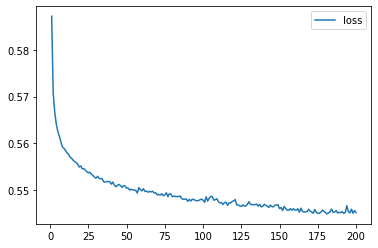

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

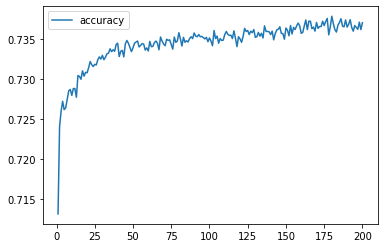

In [44]:
# Plot the loss
history_df.plot(y="accuracy")

In [45]:
# Export our model to HDF5 file
nn.save("trained_charityData.h5")